In [1]:
library('Seurat')

library('tidyr')
library('dplyr')
library('magrittr')
library('ggplot2')
library('readr')

library('gghighlight')


Attaching package: ‘dplyr’

The following objects are masked from ‘package:stats’:

    filter, lag

The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union


Attaching package: ‘magrittr’

The following object is masked from ‘package:tidyr’:

    extract



In [2]:
load('../data//all_gex-processed.Rdata')

ls()

[1] "all_gex_filtered"

Picking joint bandwidth of 43.9


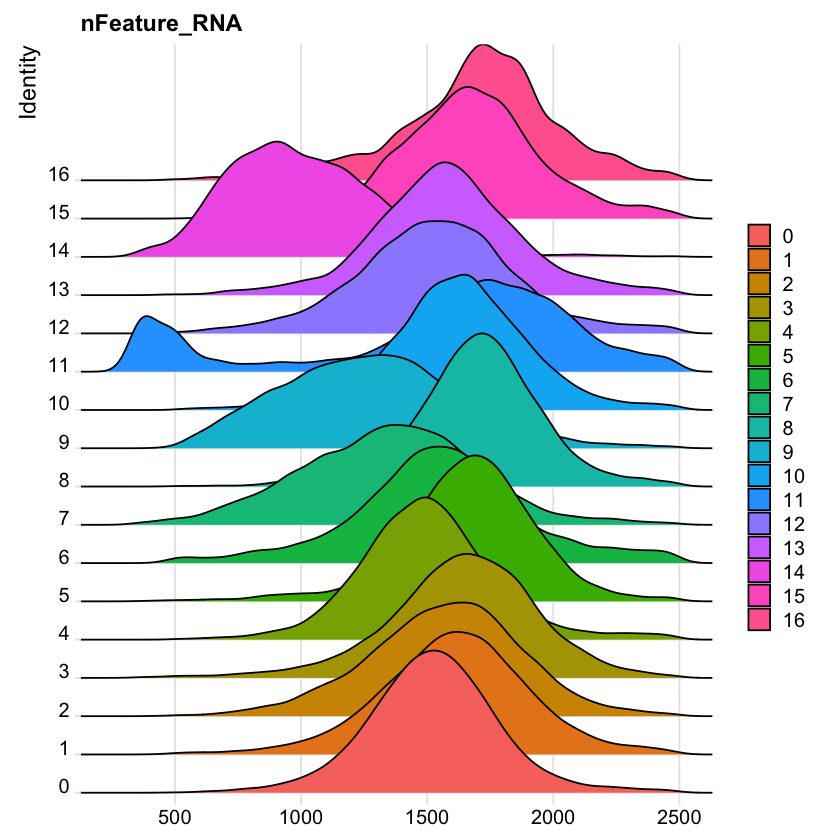

In [3]:
RidgePlot(all_gex_filtered, features = c("nFeature_RNA"))

Picking joint bandwidth of 0.0316


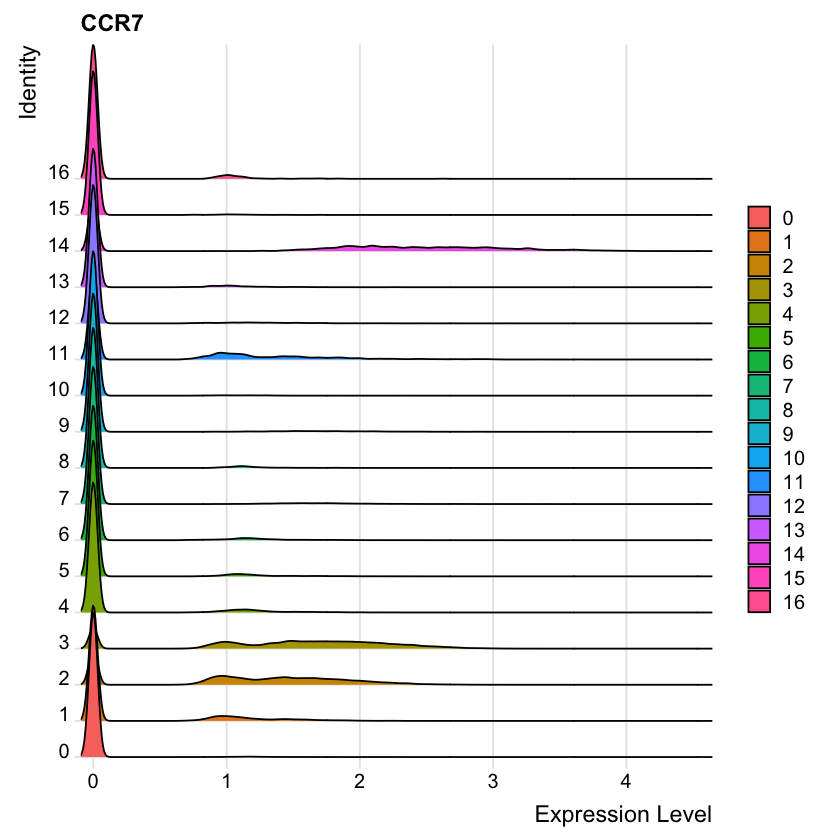

In [6]:
RidgePlot(all_gex_filtered, features = c("CCR7"))

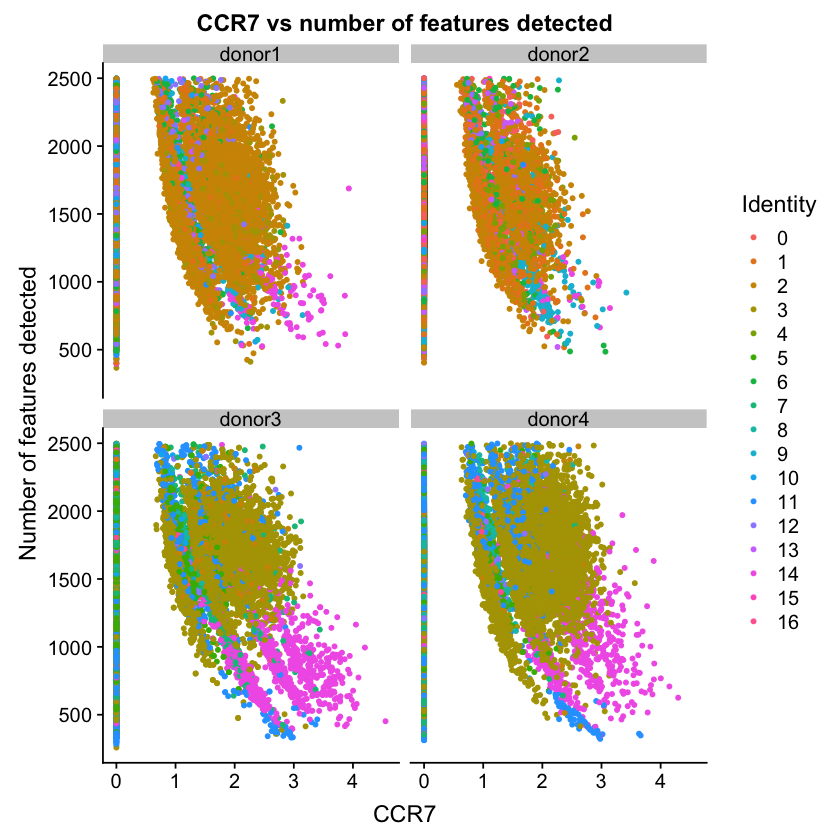

In [15]:
FeatureScatter(all_gex_filtered, feature1="CCR7", feature2="nFeature_RNA") +
    facet_wrap(~all_gex_filtered$`orig.ident`) +
    labs(
        title="CCR7 vs number of features detected",
        y="Number of features detected"
    )

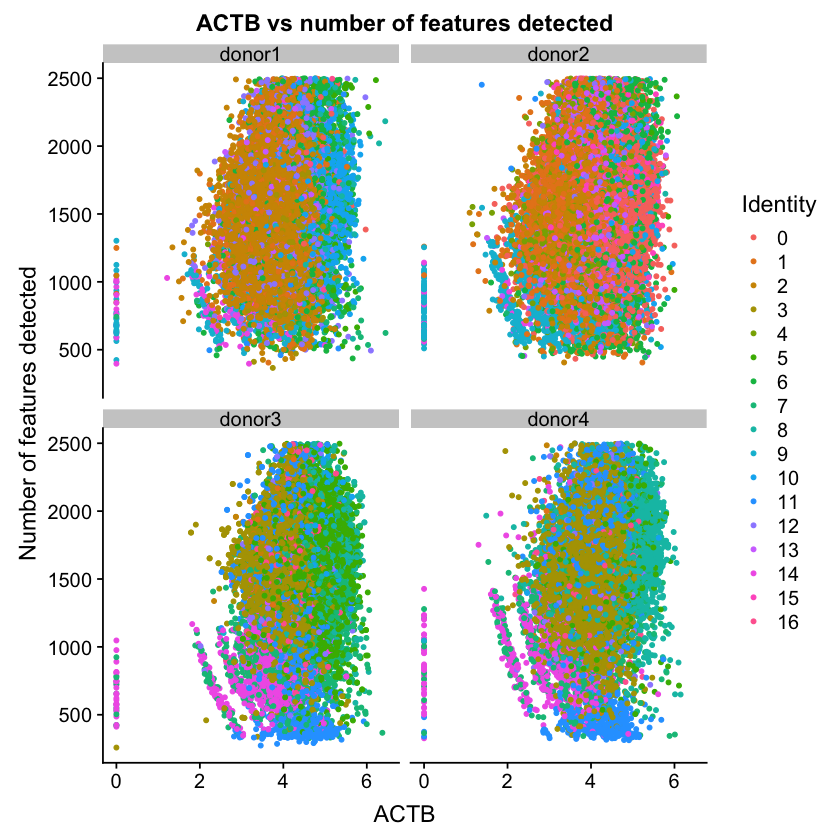

In [16]:
FeatureScatter(all_gex_filtered, feature1="ACTB", feature2="nFeature_RNA") +
    facet_wrap(~all_gex_filtered$`orig.ident`) +
    labs(
        title="ACTB vs number of features detected",
        y="Number of features detected"
    )

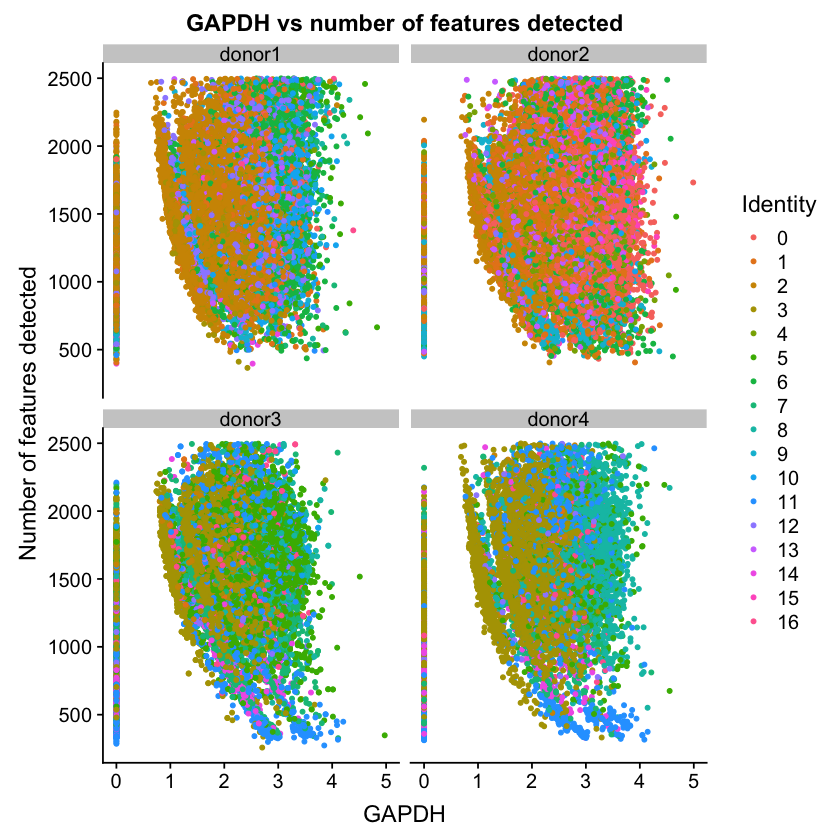

In [17]:
FeatureScatter(all_gex_filtered, feature1="GAPDH", feature2="nFeature_RNA") +
    facet_wrap(~all_gex_filtered$`orig.ident`) +
    labs(
        title="GAPDH vs number of features detected",
        y="Number of features detected"
    )

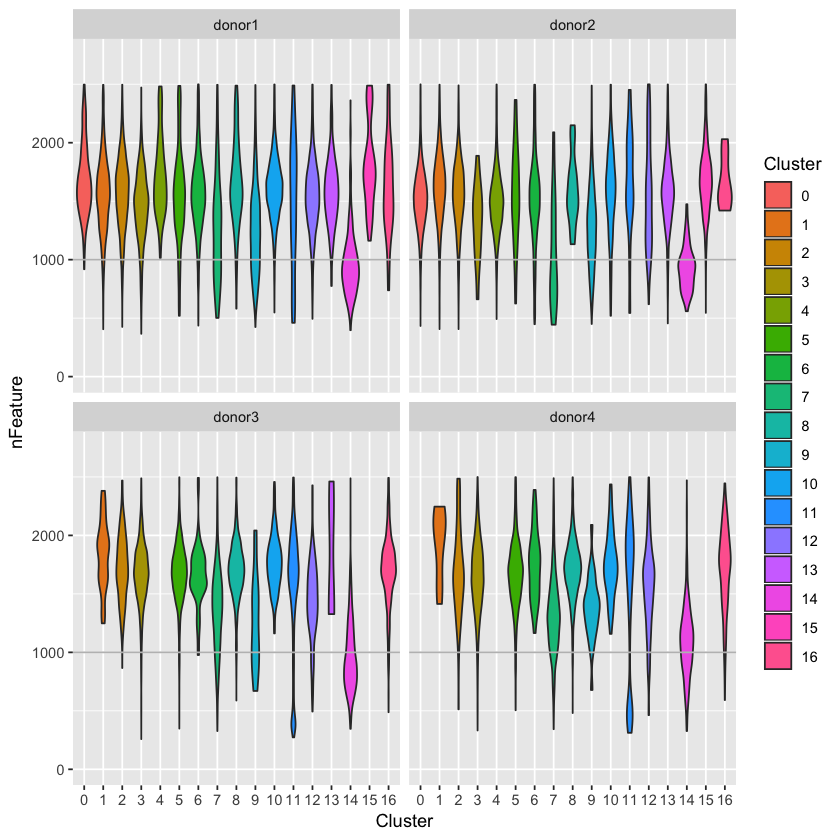

In [18]:
tibble(
    `Cluster`=as.factor(all_gex_filtered$seurat_clusters %>% unlist),
    `Donor`=as.factor(all_gex_filtered$orig.ident %>% unlist),
    `nFeature`=all_gex_filtered$nFeature_RNA %>% unlist
) %>%
ggplot(aes(y=`nFeature`, x=`Cluster`, fill=`Cluster`)) +
    geom_violin() +
    facet_wrap(~`Donor`) +
    geom_hline(yintercept=1000, color="gray") +
    ylim(0, 2750)